<a href="https://colab.research.google.com/github/EL919177/EL919177/blob/main/Copy_of_Project2pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np

For this Project, we will be looking at 2 datasets both related to healthcare.

One is in regards to the health risk factors for Heart Disease, the other is on healthy lifestyles in a city by city basis. 

We will take a look at each of these and talk about each of their particular characteristics. 

In [43]:
df=pd.read_csv('/content/drive/MyDrive/07 Week 07/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [44]:
len(df), len(df.columns)

(319795, 18)

The source of the data for the heart desease dataset is the 2020 annual CDC survey data compiled from 400k adults compiled by the Behavioral Risk Factor Surveillance System (BRFSS) phone surveys. 

The goal of the data set is to determine which risk factors are heavily correlated with increase in heart disease as the target. This is a Classification problem as a result.

There are a total of 319795 rows, 18 columns(17 features), and the issue to look out for are for duplicates as well as figuring the strongest correlating factors to the target column. The Balance issues can be remedied with logistic regression. 

As such, the first Dataset was approved, and I will further clean the data as such.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [46]:
df.isnull().sum()
# no missing values found

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [47]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()
# duplicates are dropped.

0

In [48]:
df.head()
df['HeartDisease'].value_counts(normalize=True)

No     0.909647
Yes    0.090353
Name: HeartDisease, dtype: float64

As seen here, the target is woefully unbalanced and this will be remedied once the data is cleaned up. 

In [49]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [50]:
df.value_counts()

HeartDisease  BMI    Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  DiffWalking  Sex     AgeCategory  Race      Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer
No            12.02  No       No               No      30.0            30.0          No           Female  55-59        Black     No        No                Poor       6.0        No      No             No            1
              31.19  No       No               No      0.0             2.0           No           Male    45-49        White     No        Yes               Very good  6.0        No      No             No            1
                                                                       4.0           No           Male    65-69        White     No        Yes               Very good  7.0        No      No             No            1
                                                                                                          40-44        White     No  

In [51]:
y = df['HeartDisease']
X = df.drop(columns='HeartDisease')

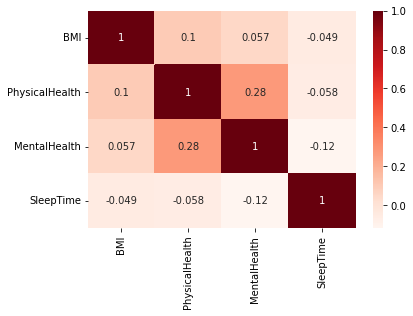

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr,cmap='Reds',annot=True);


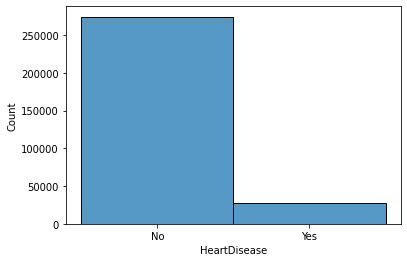

In [53]:
from seaborn.distributions import histplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='HeartDisease');

Text(0.5, 1.0, 'Relationship between BMI and Heart Disease')

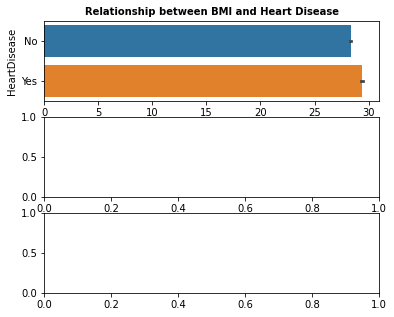

In [62]:
fig, axes = plt.subplots(nrows=3, figsize=(6,5))

sns.barplot(data=df, x='BMI', y='HeartDisease', ax=axes[0])
axes[0].set_title('Relationship between BMI and Heart Disease', fontsize=10, fontweight='bold')

